# Synthèse directe -- Synthèse par calibrage de la boucle

## Synthèse du régulateur dans les diagrammes de Bode

### Calibrage de la fonction de transfert en boucle ouverte

En reprenant tout ce qui a été démontré auparavant, nous savons que:

- à basse fréquence, l'amplitude doit être élevée pour réduire les écarts permanents, diminuer la sensibilité et éviter les distorsions dans la bande passante
- à haute fréquence, l'amplitude doit diminuer fortement afin de filtrer les bruits de mesures et avoir une sécurité contre les modes rapides négligés lors de la modélisation
- la transition entre les 2 bandes de fréquence doit être soigneusement façonnée afin de garantir des marges de stabilité correctes, avoir la bande passante voulue et éviter la résonnance

Afin de réaliser ceci, l'idée sera de déterminer le régulateur $K(e^{j\omega h})$ tel que la boucle ouverte $K(e^{j\omega h})G(e^{j\omega h})$ possède une réponse fréquencielle répondant aux exigeances ci-dessus, et montrées dans les diagrammes de Bode de la figure suivante:

![Loop shaping](Images/Chapter9/loop_shaping.png)

A basse fréquence, le module de $K(e^{j\omega h})G(e^{j\omega h})$ doit être au-dessus d'une valeur minimum; pour des fréquences élevées, le module doit être inférieur à une valeur donnée. Par exemple, à basse fréquence, la sensibilité doit être inférieure à:

$$ \left| S(e^{j\omega h}) \right| = \left| \frac{1}{1+K(e^{j\omega h})G(e^{j\omega h})} \right| \leq \epsilon $$

On en tire donc:

$$ \left| 1+K(e^{j\omega h})G(e^{j\omega h}) \right| \geq \frac{1}{\epsilon} \qquad \omega \in [0, \omega_0] \quad \omega_0 < \omega_N \quad \epsilon \ll 1 $$

Comme $\left| K(e^{j\omega h})G(e^{j\omega h}) \right| \gg 1$, on a $\left| K(e^{j\omega h})G(e^{j\omega h}) \right| \simeq \left| 1+K(e^{j\omega h})G(e^{j\omega h}) \right|$ et donc:

$$ \left| K(e^{j\omega h})G(e^{j\omega h}) \right| \geq \frac{1}{\epsilon} \qquad \omega \in [0, \omega_0] $$

Il faut donc que $\left| K(e^{j\omega h})G(e^{j\omega h}) \right|$ respecte le gabarit suivant:

$$
\left\{
\begin{array}{ll}
  \frac{1}{\epsilon} & \text{si}\; \omega \in [0, \omega_0] \\
  0 & \text{si}\; \omega \notin [0, \omega_0]
\end{array}
\right.
$$

Pour les hautes fréquences, la fonction de transfert liant le bruit de mesure à la sortie étant l'inverse de la fonction de sensibilité complémentaire, et en admettant que leur spectre est concentré dans une certaine plage $[\omega_0', \omega_0'']$, un filtrage est imposé quand l'inégalité suivante est respectée:

$$ \left| -\frac{K(e^{j\omega h})G(e^{j\omega h})}{1+K(e^{j\omega h})G(e^{j\omega h})} \right| \leq \epsilon' \qquad \omega \in [\omega_0', \omega_0''] \quad \omega_0', \omega_0'' < \omega_N \quad \epsilon' \ll 1$$

Comme $\left| K(e^{j\omega h})G(e^{j\omega h}) \right| \ll 1$, on a:

$$ \left| K(e^{j\omega h})G(e^{j\omega h}) \right| \leq \epsilon' $$

Il faut donc que $\left| K(e^{j\omega h})G(e^{j\omega h}) \right|$ respecte le gabarit suivant:

$$
\left\{
\begin{array}{ll}
  \epsilon' & \text{si}\; \omega \in [\omega_0', \omega_0''] \\
  0 & \text{si}\; \omega \notin [\omega_0', \omega_0'']
\end{array}
\right.
$$

Entre les 2 zones, une pente de $-20\, \mathrm{dB/décade}$ est souvent adoptée. Cette zone est centrée autour de $\omega_x$, par exemple dans la zone $[\omega_x /3, 3\omega_x]$, ce qui a pour conséquence que la phase tend asymptotiquement vers $-90^{\circ}$, et donc de bonnes marges de stabilité.

### Synthèse du régulateur P

Le régulateur proportionnel n'étant qu'un simple gain, son effet sur le diagramme de Bode n'est qu'une simple translation du diagramme des amplitudes en dB. Il suffit donc de choisir le gain $K_p$ afin d'obtenir le profil voulu. Cela peut être une fréquence de coupure voulue, une spécification sur les écarts permanents à atteindre, ou encore des marges de stabilité à imposer.

### Synthèse du régulateur PD  

Le régulateur PD non filtré est décrit par la fonction de transfert suivante:

$$ K(z) = K_p \left( 1 + \frac{T_d}{h} \frac{z-1}{z} \right) = K_p \left( 1 + \frac{T_d}{h} \right) \frac{z-\frac{\frac{T_d}{h}}{1+\frac{T_d}{h}}}{z} $$

Il contient donc 1 pôle et 1 zéro, le pôle représentant un retard pur d'une période d'échantillonnage. Lorsque la période d'échantillonnage est bien choisie, ce pôle a un effet négligeable dans la plage de fréquence qui nous intéresse.

Le diagramme ci-dessous permet de visualiser l'effet d'une dérivée numérique:

In [15]:
%matplotlib inline 
# notebook
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import control

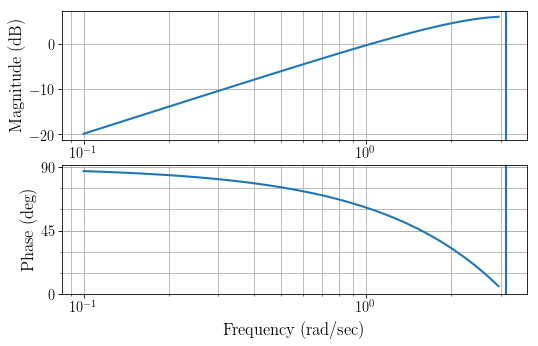

In [16]:
H = control.tf([1, -1], [1, 0], True)

_ = control.bode_plot(H, dB=True)

Comme en analogique, on remarque une augmentation de l'amplitude de $+20\, \mathrm{dB/décade}$ ainsi qu'une phase débutant à $90^{\circ}$ et chutant avec la pulsation.

L'idée va donc être de se servir de la dérivée pour améliorer la zone centrale des diagrammes de Bode, afin d'avoir une pente de $-20\, \mathrm{dB/décade}$ et une phase tendant vers $90^{\circ}$.

#### Exemple 1
Soit l'entraînement en position décrit par la fonction de transfert suivante, avec $h=0.025$:

$$ H(z) = \frac{10^{-3}(1.23z-1.21)}{(z-1)(z-0.95)} $$

Les spécifications sont les suivantes:

- statisme d'asservissement nul
- traînée inférieure ou égale à $0.05\, \mathrm{rad/s}$
- marge de phase supérieure ou égale à $60^{\circ}$
- constante de temps en boucle fermée environ de $0.07\, \mathrm{s}$

Commençons d'abord par traduire quelques valeurs du cahier des charges:

- le statisme d'asservissement nul signifie une boucle ouverte de type 1; c'est déjà le cas, donc il ne faut rien faire
- la traînée donne, en utilisant le tableau développé au chapitre 7, un $K_p=10.2$
- la constante de temps impose la pulsation de coupure $\omega_b = 14.3\, \mathrm{rad/s}$

On remarquera que la pulsation d'échantillonnage $\omega_e = 2\pi/0.025\, \mathrm{rad/s}$ est environ $18\,\omega_b$, ce qui est raisonnable.

Commençons par ajouter le gain $K_p$, puisqu'il est connu, et d'analyser les diagrammes de Bode obtenus:

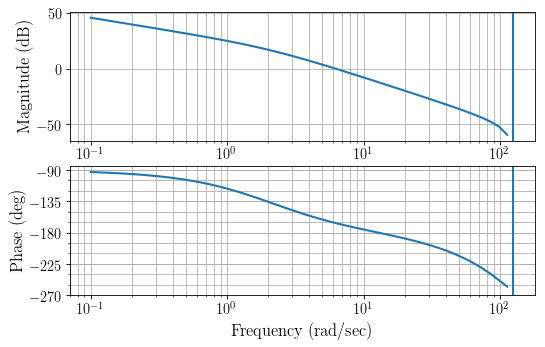

In [17]:
h = 0.025
Kp = 10.2

G = control.tf([1.23*10**-3, 1.21*10**-3], [1, -1.95, 0.95], h)

KpG = Kp * G

_ = control.bode_plot(KpG, dB=True)

On remarque que la pulsation de coupure actuelle est d'environ $6.2\, \mathrm{rad/s}$ avec une pente d'environ $-40\, \mathrm{dB/décade}$.

Il faut donc déplacer la pulsation de coupure à $14.3\, \mathrm{rad/s}$, tout en réaugmentant la phase. Pour cela, il faut choisir une valeur de $T_d$ telle qu'à la pulsation de coupure, l'amplitude vaut $0\, \mathrm{dB}$, soit une augmentation d'environ $14.125\, \mathrm{dB}$. Il est possible de le faire par calcul ou par essai erreur.

Par calcul, cela peut se faire de la manière suivante:

- on sait que la dérivée possède une pente de $+20\, \mathrm{dB/décade}$; l'asymptote est donc donnée par: $A_{dB} = 20\log{\omega} + a$
- la valeur de $a$ est trouvée aisément grâce à la pulsation de coupure voulue: $14.125 = 20\log{14.3} + a \rightarrow a = -8.98$
- il ne reste plus qu'à calculer la valeur de $\omega$ pour que l'asymptote croise l'axe des $\omega$: $0 = 20\log{\omega} - 8.98 \rightarrow \omega = 2.81$
- connaissant la pulsation de coupure du zéro dû à l'action dérivée, on peut calculer la valeur du zéro: $z-z_d \rightarrow e^{j\omega h} = z_d \rightarrow \omega_c = | \ln z_d / h | \rightarrow z_d = 1.072$
- enfin, sachant que le zéro vaut $\frac{\frac{T_d}{h}}{1+\frac{T_d}{h}}$, on obtient $T_d = 0.34$

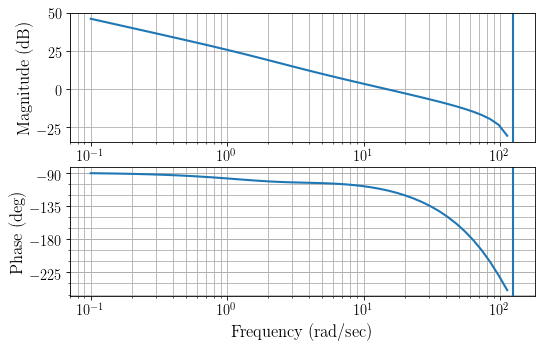

In [18]:
Td = 0.34
zd = (Td / h) / (1 + Td / h)

K = Kp * (1 + Td / h) * control.tf([1, -zd], [1, 0])

KG = K * G

_ = control.bode_plot(KG, dB=True)

Le résultat final obtenu a pour caractéristiques:

- la pulsation de coupure vaut $14.37\, \mathrm{rad/s}$
- la marge de phase vaut $66.53^{\circ}$
- la pente autour de la pulsation de coupure est de $-20\, \mathrm{dB/décade}$
- la pente en haute fréquence est aussi de $-20\, \mathrm{dB/décade}$

Il reste à vérifier la qualité des réponses indicielles et à une rampe.

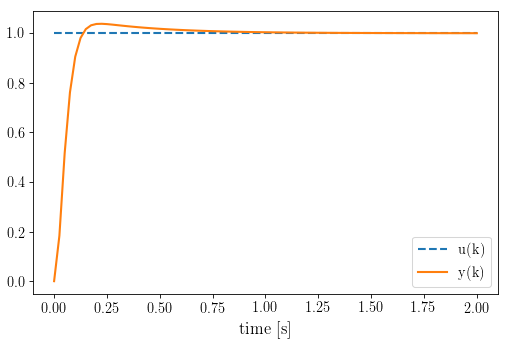

In [19]:
T = KG / (1 + KG)

u_s = [1 for i in range(81)]
t_s, y_s, _ = control.forced_response(T, U=u_s)

fig, ax = plt.subplots()
ax.plot(t_s, u_s, '--', label='u(k)')
ax.plot(t_s, y_s, '-', label='y(k)')
ax.set_xlabel('time [s]')
_ = ax.legend()

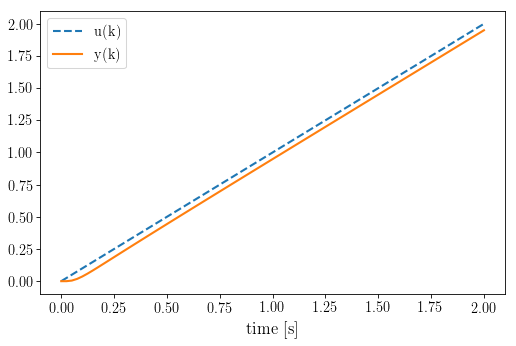

In [20]:
u_r = [i * 2 / 80 for i in range(81)]
t_r, y_r, _ = control.forced_response(T, U=u_r)

fig, ax = plt.subplots()
ax.plot(t_r, u_r, '--', label='u(k)')
ax.plot(t_r, y_r, '-', label='y(k)')
ax.set_xlabel('time [s]')
_ = ax.legend()

Les 2 simulations précédentes montrent:

- qu'il faut $0.06\, \mathrm{s}$ pour atteindre $63\%$ de la variation totale.
- que la traînée est d'environ $0.05\, \mathrm{rad}$.

Les spécifications sont donc bien remplies.

### Synthèse du régulateur PI

Le régulateur PI est décrit par la fonction de transfert suivante:

$$ K(z) = K_p \left( 1 + \frac{\frac{h}{T_i}z}{z-1} \right) = K_p \left( 1 + \frac{h}{T_i} \right) \frac{z-\frac{1}{1+\frac{h}{T_i}}}{z-1} $$

Il contient donc 1 pôle et 1 zéro.

Le diagramme ci-dessous permet de visualiser l'effet d'un intégrateur numérique:

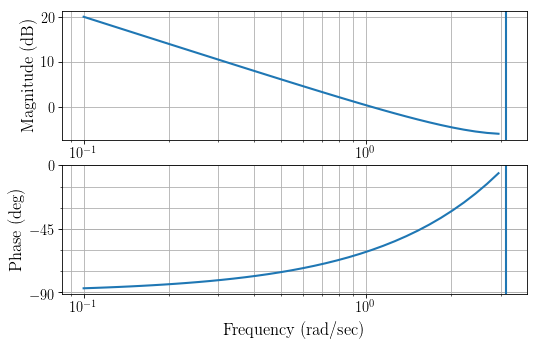

In [21]:
H = control.tf([1, 0], [1, -1], True)

_ = control.bode_plot(H, dB=True)

Comme en analogique, on remarque une diminution de l'amplitude de $-20\, \mathrm{dB/décade}$ ainsi qu'une phase débutant à $-90^{\circ}$ et augmentant avec la pulsation.

L'idée va donc être de se servir de l'intégrale pour améliorer la zone basse fréquence des diagrammes de Bode, afin d'avoir un gain important en régime permanent, permettant de réduire les écarts permanents.

#### Example 2
Soit l'entraînement en vitesse décrit par la fonction de transfert suivante, avec $h=0.025$:

$$ H(z) = \frac{0.0975}{z-0.95} $$

Les spécifications sont les suivantes:

- statisme d'asservissement nul
- marge de phase supérieure ou égale à $60^{\circ}$
- constante de temps en boucle fermée environ de $0.07\, \mathrm{s}$

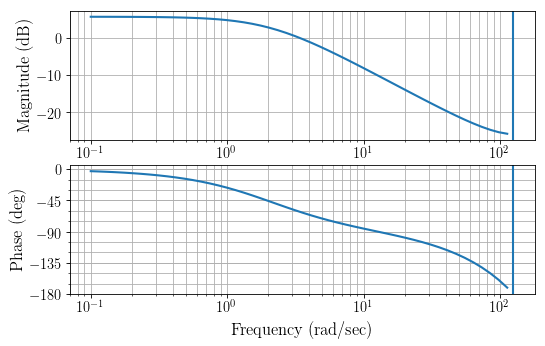

In [22]:
h = 0.025

G = control.tf(0.0975, [1, -0.95], h)

_ = control.bode_plot(G, dB=True)

On remarque qu'à la pulsation de coupure voulue, le système possède actuellement un gain de $-11.1\, \mathrm{dB}$. On va, dès lors, ajouter un gain $K_p$ équivalent:

$$ K_p = 10^\frac{11.1}{20} = 3.59 $$

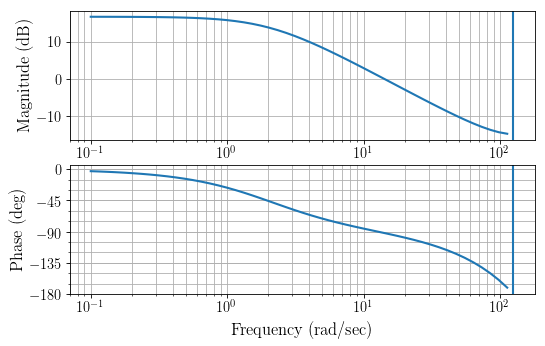

In [23]:
Kp = 3.59

KpG = Kp * G

_ = control.bode_plot(KpG, dB=True)

A ce stade, on remarque que la courbe des gains présente une chute de $3\, \mathrm{dB}$ en $\omega = 2.05\, \mathrm{rad/s}$. En effectuant un raisonnement similaire à celui du PD, on calcule:

- $z_i = e^{2.05*0.025} = 1.053$
- $z_i = \frac{1}{1+\frac{h}{T_i}} \rightarrow T_i = 0.5$

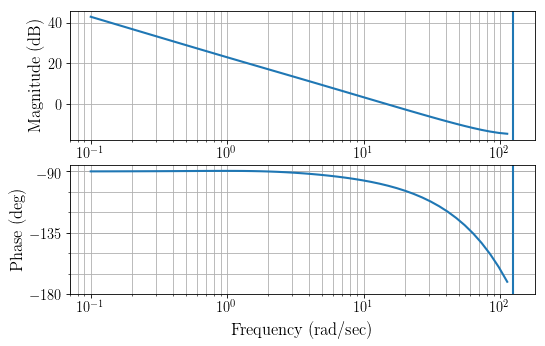

In [24]:
Ti = 0.5
zi = 1 / (1 + h / Ti)

K = Kp * (1 + h / Ti) * control.tf([1, -zi], [1, -1])

KG = K * G

_ = control.bode_plot(KG, dB=True)

Le diagramme présente une pente de $-20\, \mathrm{dB/décade}$ dans une large bande de fréquence. L'amplitude tend bien vers l'infini pour $\omega$ tendant vers $0$. Les marges de stabilité sont de $80^{\circ}$ pour la marge de phase, et à l'air de tendre vers $14.9\, \mathrm{dB}$ pour la marge de gain.

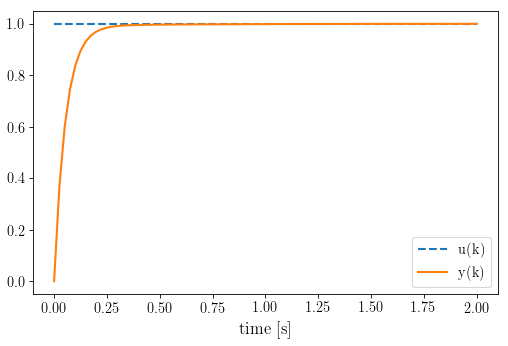

In [25]:
T = KG / (1 + KG)

u_s = [1 for i in range(81)]
t_s, y_s, _ = control.forced_response(T, U=u_s)

fig, ax = plt.subplots()
ax.plot(t_s, u_s, '--', label='u(k)')
ax.plot(t_s, y_s, '-', label='y(k)')
ax.set_xlabel('time [s]')
_ = ax.legend()

La constante de temps est approximativement de $0.057\, \mathrm{s}$.

Les sépcifications sont bien remplies.

### Synthèse du régulateur PID

Le régulateur PID série est décrit par la fonction de transfert suivante:

\begin{align}
  K(z) &= K_p \left( 1 + \frac{\frac{h}{T_i}z}{z-1} \right) \left( 1 + \frac{T_d}{h} \frac{z-1}{z} \right) \\
  &= K_p \left( 1 + \frac{T_d}{h} \right) \left( 1 + \frac{h}{T_i} \right) \frac{z-\frac{\frac{T_d}{h}}{1+\frac{T_d}{h}}}{z} \frac{z-\frac{1}{1+\frac{h}{T_i}}}{z-1}
\end{align}

On reconnaît la mise en série des 2 régulateurs vus précédemment. Cela permet de régler les paramètres du régulateur indépendamment l'un de l'autre; c'est pour cette raison que la forme série est avantageuse pour la synthèse théorique.

Comme précédemment, le régulateur va être utilisé ainsi:

- le gain proportionnel $K_p$ va servir à s'assurer d'avoir des perfomances suffisantes à basses fréquences et/ou fixer une fréquence de coupure
- la constante de temps de dérivation $T_d$ va servir à imposer des marges suffisantes
- la constante de temps d'intégration $T_i$ va servir à annuler les écarts permanents

#### Exemple 3
Reprenons l'exemple 1, mais, cette fois, la traînée doit être nulle.

Le type de la boucle ouverte doit être de 2; comme le système est de type 1, il faut une seconde intégration. Il suffit donc, grâce à la forme série, de reprendre le régulateur PD précédemment dimensionné et y ajouter un terme intégral. Cette intégrale aura en plus l'effet d'annuler tout statisme de régulation (l'effet des perturbations est annulé).

Il n'y a pas réellement de critère permettant de calculer, dans cet exemple, une valeur exacte de $T_i$. Il faut surtout s'assurer que l'intégrale soit placée à fréquence suffisemment basse par rapport à la pulsation de coupure afin de ne pas influencer la marge de phase.

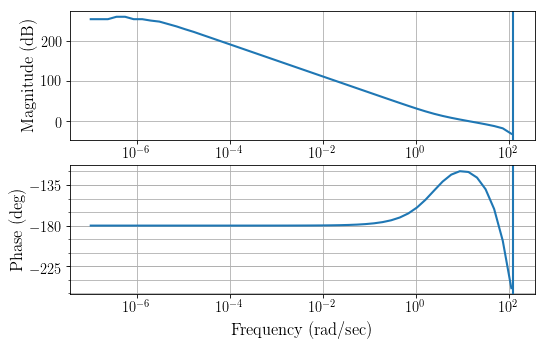

In [26]:
h = 0.025

G = control.tf([1.23 * 10 ** -3, 1.21 * 10 ** -3], [1, -1.95, 0.95], h)

Kp = 10.2
Td = 0.34
Ti = 0.5

zd = (Td / h) / (1 + Td / h)
zi = 1 / (1 + h / Ti)

K = Kp * (1 + h / Ti) * (1 + Td / h) * control.tf([1, -zd], [1, 0]) * control.tf([1, -zi], [1, -1])

KG = K * G

_ = control.bode_plot(KG, dB=True)

On obtient les résultats suivants:

- pulsation de coupure: $\omega_x = 14.8\, \mathrm{rad/s}$
- marge de phase: $M_p = 57.1^{\circ}$
- marge de gain: $M_g = 13.8\, \mathrm{dB}$

En temporel, on obtient les résultats suivants:

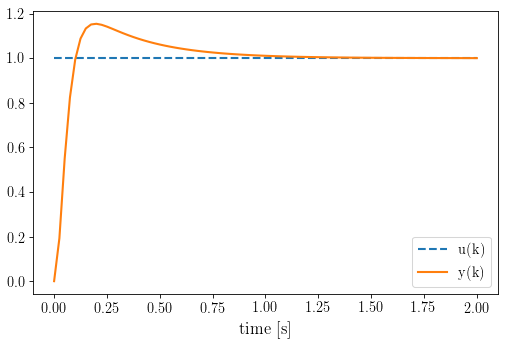

In [27]:
T = KG / (1 + KG)

u_s = [1 for i in range(81)]
t_s, y_s, _ = control.forced_response(T, U=u_s)

fig, ax = plt.subplots()
ax.plot(t_s, u_s, '--', label='u(k)')
ax.plot(t_s, y_s, '-', label='y(k)')
ax.set_xlabel('time [s]')
_ = ax.legend()

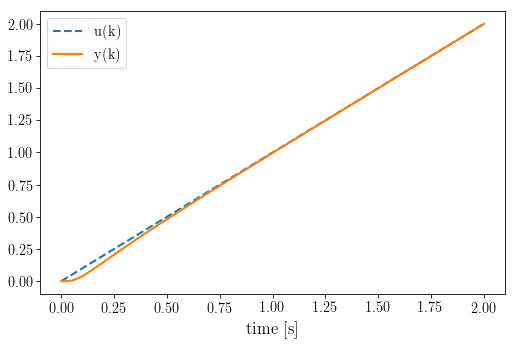

In [28]:
u_r = [i * 2 / 80 for i in range(81)]
t_r, y_r, _ = control.forced_response(T, U=u_r)

fig, ax = plt.subplots()
ax.plot(t_r, u_r, '--', label='u(k)')
ax.plot(t_r, y_r, '-', label='y(k)')
ax.set_xlabel('time [s]')
_ = ax.legend()

La traînée a bien disparu, mais au détriment d'un dépassement plus élevé lorsque le système est soumis à un échelon.